In [1]:
import pandas as pd
import matplotlib.pyplot as plt

lidl_blue = '#004fab'
lidl_red = '#e7030c'
lidl_yellow = '#fff000'

In [2]:
# load dataset
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv"
df = pd.read_csv(url, index_col=0)

# saved data also in folder to look at

# show data info
print(df.head())
print(df.info())

                chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                       
100 Grand               1       0        1               0       0   
3 Musketeers            1       0        0               0       1   
One dime                0       0        0               0       0   
One quarter             0       0        0               0       0   
Air Heads               0       1        0               0       0   

                crispedricewafer  hard  bar  pluribus  sugarpercent  \
competitorname                                                        
100 Grand                      1     0    1         0         0.732   
3 Musketeers                   0     0    1         0         0.604   
One dime                       0     0    0         0         0.011   
One quarter                    0     0    0         0         0.011   
Air Heads                      0     0    0         0         0.906   

           

In [3]:
# check if data is missing
print(df.isnull().sum())

chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


In [4]:
# Korrelationsmatrix berechnen
correlation_matrix = df.corr()

# Korrelationen mit der Beliebtheitsspalte sortieren
popularities = correlation_matrix['winpercent'].sort_values(ascending=False)

print(popularities)

winpercent          1.000000
chocolate           0.636517
bar                 0.429929
peanutyalmondy      0.406192
pricepercent        0.345325
crispedricewafer    0.324680
sugarpercent        0.229151
caramel             0.213416
nougat              0.199375
pluribus           -0.247448
hard               -0.310382
fruity             -0.380938
Name: winpercent, dtype: float64


In [5]:
# remove winpercent from correlation matrix
# correlation_matrix = correlation_matrix.drop('winpercent', axis=1)

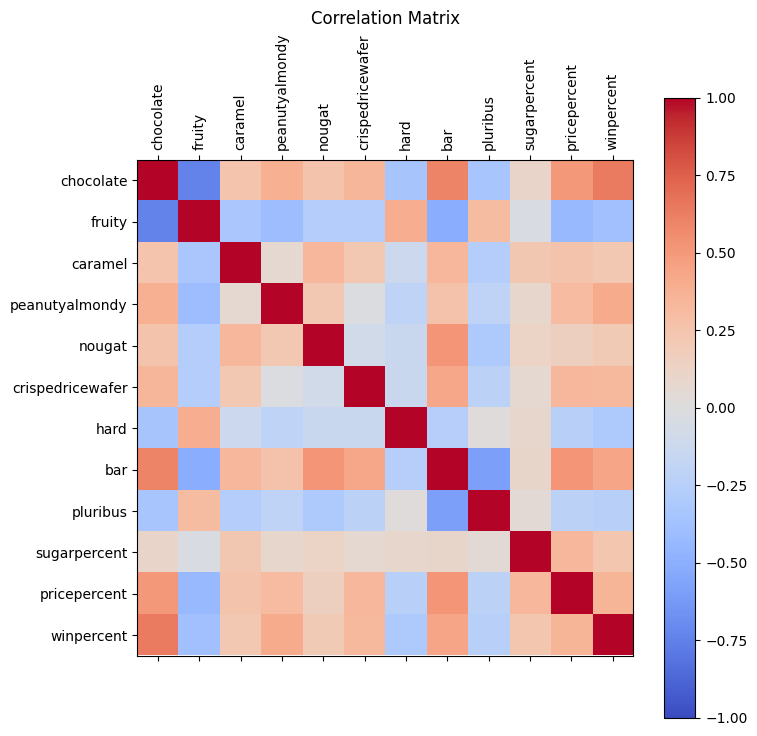

In [6]:
# visualizing the correlation 
plt.figure(figsize=(8, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

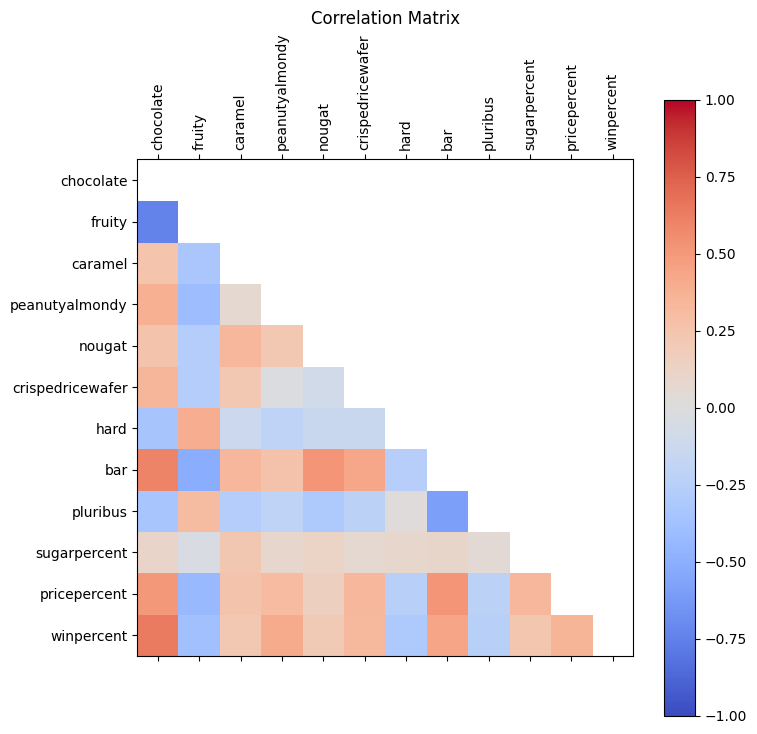

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Mask the upper triangular portion of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create a masked array using the correlation matrix and the mask
masked_corr_matrix = np.ma.masked_where(mask, correlation_matrix)

# Plot the masked correlation matrix
cax = ax.matshow(masked_corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Customize the plot
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar(cax)
plt.title('Correlation Matrix')

# Display the plot
plt.show()


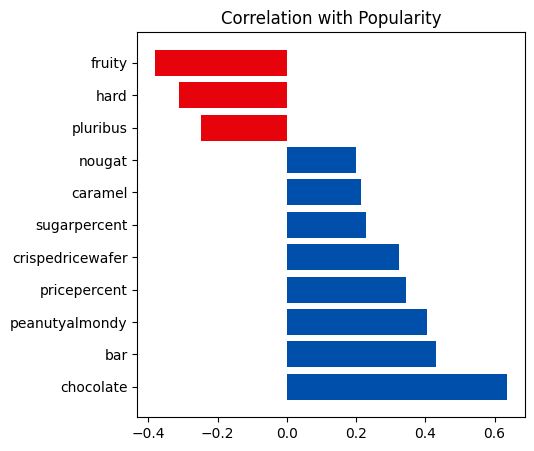

In [41]:
# dro pwinpercent from popularities
pop_bar = popularities.drop('winpercent', axis=0)

# visualize witih bar chart
plt.figure(figsize=(5, 5))
# plt.barh(pop_bar.index, pop_bar.values, color=lidl_blue)

# if positive, lidl_blue, if negative, lidl_red
for i in range(len(pop_bar)):
    if pop_bar[i] > 0:
        plt.barh(pop_bar.index[i], pop_bar.values[i], color=lidl_blue)
    else:
        plt.barh(pop_bar.index[i], pop_bar.values[i], color=lidl_red)

plt.title('Correlation with Popularity')
plt.show()

In [42]:
# Calculate correlation matrix without the last 3 columns
correlation_matrix = df.iloc[:, :-3].corr()

# create list of ingredients
ingredients = list(df.columns[0:-3])
print(ingredients, end='\n\n')

# find top 3 correlations for each ingredient
for ingredient in ingredients:
    print(ingredient)
    print(correlation_matrix[ingredient].nlargest(4)[1:])               # in this case the first one (1.0) is always the target itself
    print('\n')

['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']

chocolate
bar                 0.597421
peanutyalmondy      0.377824
crispedricewafer    0.341210
Name: chocolate, dtype: float64


fruity
hard        0.390678
pluribus    0.299725
nougat     -0.269367
Name: fruity, dtype: float64


caramel
bar          0.333960
nougat       0.328493
chocolate    0.249875
Name: caramel, dtype: float64


peanutyalmondy
chocolate    0.377824
bar          0.260420
nougat       0.213113
Name: peanutyalmondy, dtype: float64


nougat
bar          0.522976
caramel      0.328493
chocolate    0.254892
Name: nougat, dtype: float64


crispedricewafer
bar          0.423751
chocolate    0.341210
caramel      0.213113
Name: crispedricewafer, dtype: float64


hard
fruity      0.390678
pluribus    0.014532
caramel    -0.122355
Name: hard, dtype: float64


bar
chocolate           0.597421
nougat              0.522976
crispedricewafer    0.423751
Name: bar, dtyp

In [ ]:
# visualize the top 3 correlations for each ingredient
for ingredient in ingredients:
    plt.figure(figsize=(5, 5))
    plt.barh(correlation_matrix[ingredient].nlargest(4)[1:].index, correlation_matrix[ingredient].nlargest(4)[1:].values, color=lidl_blue)
    plt.title('Top 3 Correlations for ' + ingredient)
    plt.show()

In [ ]:
# see how much sugar is in the candy
# sugar = df['sugarpercent']

# Experiments

In [48]:
# neural network